import library

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

load data

In [ ]:
#1- upload mnist.npz in my google drive
#2- load dataset from google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(path):
  with np.load(path) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data('/content/drive/My Drive/project/mnist.npz')


  
    
    
    
    

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Input data is vary from 0(Black) to 255(White). so here scaling in between 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Input data need to be flattened such that it will be given as input using 28 * 28 neurons
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


### model 1

In [ ]:
# Creating neural network and fitting the model
model = keras.Sequential([
    #keras.layers.Dense(output layer neurons, input layer neurons,activation function)
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4704 - accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2528 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 985us/step - loss: 0.2647 - accuracy: 0.9280


[0.26473569869995117, 0.9279999732971191]

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 712us/step


In [ ]:
#Confusion matrix of Test data
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    6,    4,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  926,   12,    7,    2,   15,   12,   39,    4],
       [   4,    0,   20,  918,    0,   22,    3,   10,   23,   10],
       [   1,    1,    3,    2,  917,    0,   11,    4,    8,   35],
       [  10,    2,    2,   34,   10,  768,   17,    9,   34,    6],
       [   9,    3,    8,    1,    7,    8,  918,    2,    2,    0],
       [   1,    6,   23,    2,    6,    1,    0,  959,    3,   27],
       [   7,    7,    6,   19,    8,   19,   10,   12,  879,    7],
       [  11,    7,    1,    8,   23,    6,    0,   25,    6,  922]],
      dtype=int32)>

### model 2

In [ ]:
#change layesr dense to 100 layer and add a layer and activation function to relu

In [ ]:
#Neural Network with hidden layer
# Creating neural network and fitting the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1211 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0842 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0403 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0320 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.018

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 963us/step - loss: 0.0872 - accuracy: 0.9765


[0.08719263225793839, 0.9764999747276306]

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 840us/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    0,    1,    1,    1,    3,    1],
       [   0, 1126,    3,    1,    0,    1,    1,    0,    3,    0],
       [   7,    3, 1007,    3,    0,    0,    2,    6,    4,    0],
       [   0,    0,    7,  987,    0,    2,    0,    3,    3,    8],
       [   2,    0,    3,    1,  939,    0,    6,    3,    2,   26],
       [   3,    1,    0,   10,    1,  866,    1,    1,    4,    5],
       [   4,    3,    0,    1,    1,   10,  936,    0,    3,    0],
       [   1,    6,    6,    6,    0,    0,    0, 1003,    2,    4],
       [   7,    0,    1,    5,    2,    6,    1,    3,  947,    2],
       [   2,    4,    0,    4,    2,    2,    1,    6,    5,  983]],
      dtype=int32)>

### model 3


In [ ]:
#Neural Network with hidden layer
# Creating neural network and fitting the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5224 - accuracy: 0.8474
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2749 - accuracy: 0.9215
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2481 - accuracy: 0.9295
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2354 - accuracy: 0.9326
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2264 - accuracy: 0.9355
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2180 - accuracy: 0.9386
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2129 - accuracy: 0.9400
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2081 - accuracy: 0.9420
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2049 - accuracy: 0.9417
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.201

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 864us/step - loss: 0.2159 - accuracy: 0.9393


[0.21586906909942627, 0.939300000667572]

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 703us/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    4,    2,    3,    3,    6,    3,    1,    0],
       [   0, 1114,    5,    0,    0,    1,    4,    3,    8,    0],
       [  11,    6,  955,    8,   17,    2,    5,   15,   12,    1],
       [   1,    0,   15,  927,    3,   15,    0,   23,   21,    5],
       [   2,    0,    2,    0,  934,    0,   19,    4,    2,   19],
       [   9,    5,    1,   26,    4,  800,   13,    8,   16,   10],
       [  10,    3,    4,    0,    7,   14,  916,    0,    4,    0],
       [   2,    3,   11,    7,    8,    0,    0,  977,    2,   18],
       [   9,    7,    6,   13,    6,    7,    6,   14,  892,   14],
       [   5,    6,    0,    7,   40,    3,    0,   15,   13,  920]],
      dtype=int32)>

### model 4

In [71]:
#Neural Network with hidden layer
# Creating neural network and fitting the model
model = keras.Sequential([
    keras.layers.Dense(5, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(5, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(5, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1302 - accuracy: 0.6124
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5776 - accuracy: 0.8341
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5116 - accuracy: 0.8527
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4828 - accuracy: 0.8611
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4650 - accuracy: 0.8674
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4509 - accuracy: 0.8715
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4383 - accuracy: 0.8751
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4265 - accuracy: 0.8795
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4139 - accuracy: 0.8810
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.404

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 912us/step - loss: 0.3996 - accuracy: 0.8864


[0.3996394872665405, 0.8863999843597412]

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 787us/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 930,    0,    8,    1,    2,   16,    4,   16,    3,    0],
       [   0, 1102,    3,    8,    4,    2,    2,    2,   12,    0],
       [  13,   12,  877,   40,   15,   29,   14,   22,    7,    3],
       [   0,    4,   22,  896,    2,   56,    0,   18,    7,    5],
       [   1,    1,    3,    0,  921,    0,    7,    8,    0,   41],
       [  31,    2,   11,   41,   10,  720,    6,   12,   55,    4],
       [  23,    6,   31,    0,   14,   19,  854,    0,   11,    0],
       [   2,   11,   14,   14,   13,    1,    0,  938,    0,   35],
       [   3,   16,    6,   33,   33,   96,   12,    7,  736,   32],
       [   2,    2,    2,    8,   62,   16,    0,   19,    8,  890]],
      dtype=int32)>

### model 5

In [ ]:
#Neural Network with hidden layer
# Creating neural network and fitting the model
model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3087 - accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1377 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1053 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0854 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0711 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0640 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0551 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0499 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0438 - accuracy: 0.9856
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.040

In [ ]:
#Neural Network with hidden layer
# Creating neural network and fitting the model
model = keras.Sequential([
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(50, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_flattened, y_train, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3087 - accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1377 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1053 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0854 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0711 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0640 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0551 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0499 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0438 - accuracy: 0.9856
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.040

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 957us/step - loss: 0.0978 - accuracy: 0.9739


[0.09775908291339874, 0.9739000201225281]

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 823us/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    0,    0,    3,    0,    3,    0],
       [   0, 1119,    4,    0,    0,    1,    1,    0,   10,    0],
       [   1,    1,  989,   17,    2,    2,    0,    7,   13,    0],
       [   0,    0,    4,  993,    0,    2,    0,    0,    8,    3],
       [   2,    0,    2,    0,  957,    1,    7,    1,    1,   11],
       [   5,    0,    0,   35,    1,  836,    3,    1,    7,    4],
       [   5,    2,    3,    0,    5,   11,  928,    0,    4,    0],
       [   1,    4,    8,   11,    4,    0,    0,  986,    4,   10],
       [   2,    0,    3,    8,    3,    3,    2,    4,  947,    2],
       [   4,    3,    1,   13,   11,    1,    0,    4,    8,  964]],
      dtype=int32)>

In [ ]:
print(history.history)

{'loss': [0.3087407946586609, 0.13771702349185944, 0.10534470528364182, 0.08543440699577332, 0.07114973664283752, 0.06404820084571838, 0.05509909242391586, 0.049882858991622925, 0.04378439486026764, 0.0404929518699646], 'accuracy': [0.9082499742507935, 0.9588000178337097, 0.9682833552360535, 0.9733999967575073, 0.9777500033378601, 0.9797000288963318, 0.9820833206176758, 0.98416668176651, 0.9855666756629944, 0.9873499870300293]}


In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


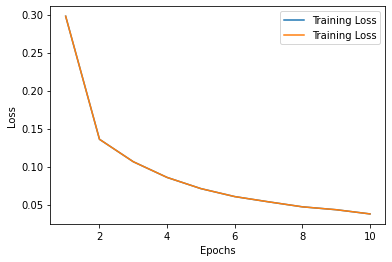

In [67]:
loss_values = history.history['loss']
loss_train = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, loss_train, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

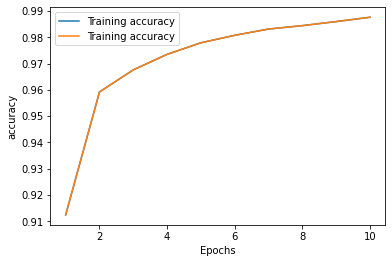

In [69]:
accuracy_values = history.history['accuracy']
accuracy_train = history.history['accuracy']
epochs = range(1, len(accuracy_values)+1)
epochs2 = range(1, len(accuracy_train)+1)
plt.plot(epochs, accuracy_values, label='Training accuracy')
plt.plot(epochs2, accuracy_train, label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()